In [1]:
from include.road_process import Road
from include.cool_space import CoolSpace
from include.building import Building
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt

In [2]:
directory_mac = "/Volumes/T7 Shield/TUD/Synthesis/cool_place/"
directory_win = "G:\\TUD\\Synthesis\\cool_place\\"

landuse_file = directory_win + "ams_landuse_top10NL.shp"
road_file = directory_win + "ams_roads_top10NL.shp"
building_file = directory_win + "ams_buildings_bagplus.shp"
shadow_file = directory_win + "testShadow.tif"

In [3]:
road = Road(gpd.read_file(road_file))

In [4]:
building = Building(gpd.read_file(building_file))

In [5]:
coolSpace = CoolSpace(gpd.read_file(landuse_file))

In [6]:
shadows = []
shadow_map1 = rasterio.open(shadow_file, crs=coolSpace.data.crs)
print(shadow_map1.crs)
shadows.append(shadow_map1)

EPSG:28992


In [7]:
road.create_attribute('typeweg', 'buffer')
road.create_buffer('buffer')
building.create_buffer(4)

Buffered geometry column created.
Buffered geometry column created.


In [8]:
road.data = road.data.set_geometry("buffered")
coolSpace.clip(coolSpace.data, road.data)

building.data = building.data.set_geometry("buffered")
coolSpace.data = coolSpace.data.set_geometry("clipped")
coolSpace.clip(coolSpace.data, building.data)

D:\Files\GitHub\shady_amsterdam\cool_place\include\cool_space.py:28: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:28992
Right CRS: None

  clipped = gpd.overlay(to_clip, clipper, how=how, keep_geom_type=False)


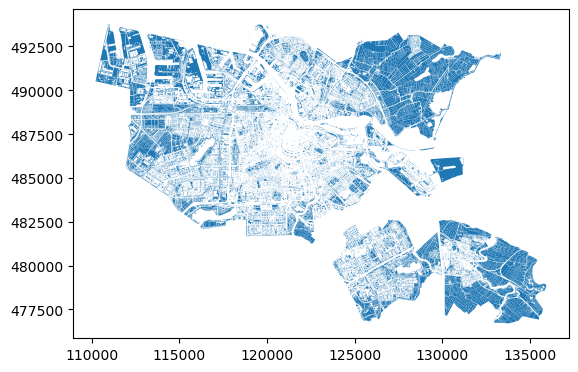

In [9]:
coolSpace.data["clipped"].plot()
plt.show()

In [10]:
coolSpace.calculate_shade(shadows, use_clip=True)

Processing raster 1/1
POLYGON ((120000 484980, 120000 486270, 118980 486270, 118980 484980, 120000 484980))
Clipped geometry 11677, area: 1984.998322506913
Clipped geometry 11678, area: 3857.6895700080686
Clipped geometry 11679, area: 3454.4198570291205
Clipped geometry 11685, area: 1497.093628030177
Clipped geometry 11692, area: 844.4672969684832
Clipped geometry 11695, area: 34.305333116214264
Clipped geometry 11698, area: 1994.9557704415338
Clipped geometry 13614, area: 748.088300340057
Clipped geometry 13615, area: 403.50569181170425
Clipped geometry 13617, area: 18.655040760244635
Clipped geometry 13622, area: 345.4902696483735
Clipped geometry 13725, area: 592.3138714766383
Clipped geometry 13730, area: 430.9294821933946
Clipped geometry 13731, area: 1007.4276110496487
Clipped geometry 13734, area: 932.3232673301802
Clipped geometry 13736, area: 930.0989844059798
Clipped geometry 13737, area: 609.0735332275706
Clipped geometry 13738, area: 194.35156144616298
Clipped geometry 1373

In [13]:
# 打印 shadeGeom0 列中不是 None 的行
non_none_rows = coolSpace.data[coolSpace.data["shadeGeom0"].notna()]
print(non_none_rows[["shadeGeom0"]]["shadeGeom0"].area.max())
print(non_none_rows[["shadeGeom0"]]["shadeGeom0"].area.min())

6478.5
207.5


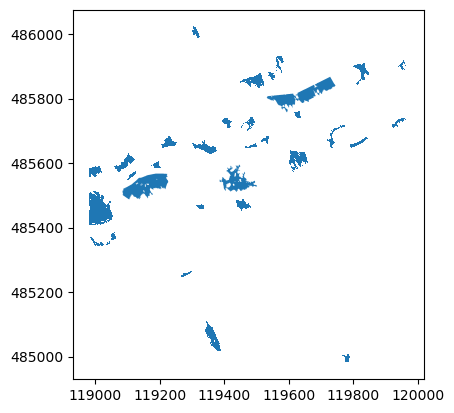

In [12]:
coolSpace.data["shadeGeom0"].plot()
plt.show()

In [ ]:
coolSpace_clipped = gpd.GeoDataFrame(coolSpace.data, geometry='clipped', crs=coolSpace.data.crs)
coolSpace_clipped.drop(columns=["geometry"], inplace=True)
coolSpace_clipped.to_file(directory_win + "test.shp")

coolSpace_origin = gpd.GeoDataFrame(coolSpace.data, geometry='geometry', crs=coolSpace.data.crs)
coolSpace_origin.drop(columns=["clipped"], inplace=True)
coolSpace_origin.to_file(directory_win + "test2.shp")